# TRAINING DATA ,MODEL BULIDING AND PREDICTION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_excel('preprocessed_data.xls')

In [3]:
data.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating,Education
0,0.333333,1,0.6,0.5,1.0,0.722222,1.0,0.321429,0.50,1.000000,...,0.250,0.333333,0.333333,0.250,0.388889,0.000000,0.470588,1,3,0.6
1,0.690476,1,0.6,0.5,1.0,0.722222,1.0,0.464286,0.75,1.000000,...,0.500,0.333333,0.666667,0.175,0.388889,0.066667,0.411765,1,3,0.6
2,0.523810,1,1.0,1.0,1.0,0.722222,0.5,0.142857,0.75,1.000000,...,0.500,0.333333,0.666667,0.450,0.722222,0.066667,0.705882,1,4,1.0
3,0.547619,1,0.0,0.0,0.4,0.444444,1.0,0.321429,0.75,0.333333,...,0.575,0.333333,0.333333,0.525,0.333333,0.800000,0.352941,1,3,0.0
4,1.000000,1,0.6,0.5,1.0,0.722222,1.0,0.535714,0.75,0.000000,...,0.250,0.166667,0.666667,0.050,0.111111,0.133333,0.117647,1,3,0.6


In [4]:
# split data into x and y
x=data.drop('PerformanceRating',axis=1)
y=data['PerformanceRating']

In [5]:
## creating training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x, y,test_size=0.3,random_state=3)

In [6]:
x_train.shape, x_test.shape, y_test.shape,y_train.shape

((840, 27), (360, 27), (360,), (840,))

In [7]:
# Checking if data is balanced
data['PerformanceRating'].value_counts()  ## Imbalanced

3    874
2    194
4    132
Name: PerformanceRating, dtype: int64

# SMOTE

In [8]:
# Using SMOTE to balance the data
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [9]:
x_smote,y_smote = smote.fit_resample(x_train,y_train)

In [10]:
x_smote.shape,y_smote.shape

((1794, 27), (1794,))

In [11]:
y_smote.value_counts()

3    598
4    598
2    598
Name: PerformanceRating, dtype: int64

# CLASSIFICATION MODELS

### LOGISTIC REGRESSION

In [12]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_smote, y_smote)

LogisticRegression()

In [13]:
y_pred_test = lr.predict(x_test)
y_pred_train=lr.predict(x_train)

In [14]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,classification_report

In [15]:
print('Train set Accuracy: ' )
print(accuracy_score(y_train,y_pred_train))
print('_____________________________________\n')

print('Test set Accuracy:')
print(accuracy_score(y_test,y_pred_test))

Train set Accuracy: 
0.7559523809523809
_____________________________________

Test set Accuracy:
0.725


In [16]:
print(classification_report(y_pred_test, y_test))

              precision    recall  f1-score   support

           2       0.75      0.39      0.51       100
           3       0.71      0.95      0.81       208
           4       0.78      0.48      0.60        52

    accuracy                           0.73       360
   macro avg       0.75      0.61      0.64       360
weighted avg       0.73      0.72      0.70       360



# KNN

In [17]:
# import KNN algorithm
from sklearn.neighbors import KNeighborsClassifier
# create empty list to store error values
error_rate=[]

for i in range(1,11):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(x_smote,y_smote)
    y_pred=model.predict(x_test)
    error_rate.append(np.mean(y_pred!=y_test))
error_rate

[0.39166666666666666,
 0.4083333333333333,
 0.4638888888888889,
 0.4722222222222222,
 0.4777777777777778,
 0.4861111111111111,
 0.49722222222222223,
 0.49166666666666664,
 0.5111111111111111,
 0.49722222222222223]

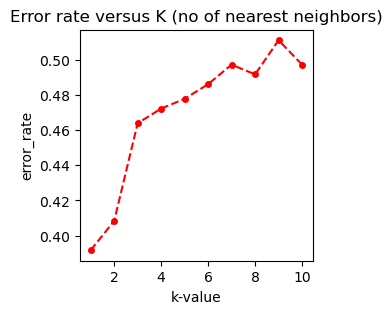

In [18]:
plt.figure(figsize=(3,3))
plt.plot(range(1,11),error_rate,color="red",linestyle="dashed",marker='o',markersize=4)
plt.title("Error rate versus K (no of nearest neighbors)")
plt.xlabel("k-value")
plt.ylabel("error_rate")
plt.show()

Error is less when k=1

In [19]:
knn_model=KNeighborsClassifier(n_neighbors=1)
knn_model.fit(x_smote,y_smote)
y_predknn_test=knn_model.predict(x_test)
y_predknn_train=knn_model.predict(x_train)

In [20]:
print('Train set Accuracy: ' )
print(accuracy_score(y_train,y_predknn_train))
print('_____________________________________\n')

print('Test set Accuracy:')
print(accuracy_score(y_test,y_predknn_test))

Train set Accuracy: 
1.0
_____________________________________

Test set Accuracy:
0.6083333333333333


# SVM

In [21]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear') ## base model with default parameters
svclassifier.fit(x_smote, y_smote)

SVC(kernel='linear')

In [22]:
y_predsvm_test=svclassifier.predict(x_test)
y_predsvm_train=svclassifier.predict(x_train)

In [23]:
print('Train set Accuracy: ' )
print(accuracy_score(y_train,y_predsvm_train))
print('_____________________________________\n')

print('Test set Accuracy:')
print(accuracy_score(y_test,y_predsvm_test))

Train set Accuracy: 
0.7559523809523809
_____________________________________

Test set Accuracy:
0.7166666666666667


In [24]:
print(classification_report(y_test,y_predsvm_test))

              precision    recall  f1-score   support

           2       0.39      0.79      0.52        52
           3       0.95      0.70      0.80       276
           4       0.49      0.78      0.60        32

    accuracy                           0.72       360
   macro avg       0.61      0.76      0.64       360
weighted avg       0.82      0.72      0.74       360



# HYPERPARAMETER TUNING

In [25]:
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.1,5,10,50,60],'gamma':[0.0001,0.001,0.01,0.1,1],'random_state':list(range(1,10))}
model=SVC()
gd_svm=GridSearchCV(model,param_grid,verbose=2,scoring='accuracy',cv=5)
gd_svm.fit(x_smote,y_smote)

Fitting 5 folds for each of 225 candidates, totalling 1125 fits
[CV] END ................C=0.1, gamma=0.0001, random_state=1; total time=   0.1s
[CV] END ................C=0.1, gamma=0.0001, random_state=1; total time=   0.1s
[CV] END ................C=0.1, gamma=0.0001, random_state=1; total time=   0.1s
[CV] END ................C=0.1, gamma=0.0001, random_state=1; total time=   0.1s
[CV] END ................C=0.1, gamma=0.0001, random_state=1; total time=   0.1s
[CV] END ................C=0.1, gamma=0.0001, random_state=2; total time=   0.1s
[CV] END ................C=0.1, gamma=0.0001, random_state=2; total time=   0.1s
[CV] END ................C=0.1, gamma=0.0001, random_state=2; total time=   0.1s
[CV] END ................C=0.1, gamma=0.0001, random_state=2; total time=   0.1s
[CV] END ................C=0.1, gamma=0.0001, random_state=2; total time=   0.1s
[CV] END ................C=0.1, gamma=0.0001, random_state=3; total time=   0.1s
[CV] END ................C=0.1, gamma=0.0001,

[CV] END ..................C=0.1, gamma=0.01, random_state=3; total time=   0.1s
[CV] END ..................C=0.1, gamma=0.01, random_state=3; total time=   0.1s
[CV] END ..................C=0.1, gamma=0.01, random_state=3; total time=   0.1s
[CV] END ..................C=0.1, gamma=0.01, random_state=3; total time=   0.1s
[CV] END ..................C=0.1, gamma=0.01, random_state=4; total time=   0.1s
[CV] END ..................C=0.1, gamma=0.01, random_state=4; total time=   0.1s
[CV] END ..................C=0.1, gamma=0.01, random_state=4; total time=   0.1s
[CV] END ..................C=0.1, gamma=0.01, random_state=4; total time=   0.1s
[CV] END ..................C=0.1, gamma=0.01, random_state=4; total time=   0.1s
[CV] END ..................C=0.1, gamma=0.01, random_state=5; total time=   0.1s
[CV] END ..................C=0.1, gamma=0.01, random_state=5; total time=   0.1s
[CV] END ..................C=0.1, gamma=0.01, random_state=5; total time=   0.1s
[CV] END ..................C

[CV] END .....................C=0.1, gamma=1, random_state=5; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, random_state=5; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, random_state=6; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, random_state=6; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, random_state=6; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, random_state=6; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, random_state=6; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, random_state=7; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, random_state=7; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, random_state=7; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, random_state=7; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, random_state=7; total time=   0.1s
[CV] END ...................

[CV] END ...................C=5, gamma=0.001, random_state=8; total time=   0.1s
[CV] END ...................C=5, gamma=0.001, random_state=8; total time=   0.1s
[CV] END ...................C=5, gamma=0.001, random_state=8; total time=   0.1s
[CV] END ...................C=5, gamma=0.001, random_state=8; total time=   0.1s
[CV] END ...................C=5, gamma=0.001, random_state=9; total time=   0.1s
[CV] END ...................C=5, gamma=0.001, random_state=9; total time=   0.1s
[CV] END ...................C=5, gamma=0.001, random_state=9; total time=   0.1s
[CV] END ...................C=5, gamma=0.001, random_state=9; total time=   0.1s
[CV] END ...................C=5, gamma=0.001, random_state=9; total time=   0.1s
[CV] END ....................C=5, gamma=0.01, random_state=1; total time=   0.0s
[CV] END ....................C=5, gamma=0.01, random_state=1; total time=   0.0s
[CV] END ....................C=5, gamma=0.01, random_state=1; total time=   0.0s
[CV] END ...................

[CV] END .......................C=5, gamma=1, random_state=1; total time=   0.0s
[CV] END .......................C=5, gamma=1, random_state=1; total time=   0.0s
[CV] END .......................C=5, gamma=1, random_state=2; total time=   0.0s
[CV] END .......................C=5, gamma=1, random_state=2; total time=   0.0s
[CV] END .......................C=5, gamma=1, random_state=2; total time=   0.0s
[CV] END .......................C=5, gamma=1, random_state=2; total time=   0.0s
[CV] END .......................C=5, gamma=1, random_state=2; total time=   0.0s
[CV] END .......................C=5, gamma=1, random_state=3; total time=   0.0s
[CV] END .......................C=5, gamma=1, random_state=3; total time=   0.0s
[CV] END .......................C=5, gamma=1, random_state=3; total time=   0.0s
[CV] END .......................C=5, gamma=1, random_state=3; total time=   0.0s
[CV] END .......................C=5, gamma=1, random_state=3; total time=   0.0s
[CV] END ...................

[CV] END ..................C=10, gamma=0.001, random_state=4; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=4; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=4; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=4; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=5; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=5; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=5; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=5; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=5; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ..................C

[CV] END ....................C=10, gamma=0.1, random_state=6; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=7; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=7; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=7; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=7; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=7; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=8; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=8; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=8; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=8; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=8; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=9; total time=   0.0s
[CV] END ...................

[CV] END .................C=50, gamma=0.0001, random_state=9; total time=   0.1s
[CV] END .................C=50, gamma=0.0001, random_state=9; total time=   0.1s
[CV] END .................C=50, gamma=0.0001, random_state=9; total time=   0.1s
[CV] END ..................C=50, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=2; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=2; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=2; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=2; total time=   0.0s
[CV] END ..................C

[CV] END ....................C=50, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ...................

[CV] END .................C=60, gamma=0.0001, random_state=5; total time=   0.1s
[CV] END .................C=60, gamma=0.0001, random_state=6; total time=   0.1s
[CV] END .................C=60, gamma=0.0001, random_state=6; total time=   0.1s
[CV] END .................C=60, gamma=0.0001, random_state=6; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=6; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=6; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=7; total time=   0.1s
[CV] END .................C=60, gamma=0.0001, random_state=7; total time=   0.1s
[CV] END .................C=60, gamma=0.0001, random_state=7; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=7; total time=   0.1s
[CV] END .................C=60, gamma=0.0001, random_state=7; total time=   0.1s
[CV] END .................C=60, gamma=0.0001, random_state=8; total time=   0.1s
[CV] END .................C=

[CV] END ...................C=60, gamma=0.01, random_state=8; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=8; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=9; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=9; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=9; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=9; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=9; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=1; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=1; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=1; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=1; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=1; total time=   0.0s
[CV] END ...................

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 5, 10, 50, 60],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1],
                         'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
             scoring='accuracy', verbose=2)

In [26]:
print(gd_svm.best_params_)

{'C': 5, 'gamma': 1, 'random_state': 1}


In [27]:
svclassifier=SVC(C=5,gamma=1,random_state=1,probability=True)
svclassifier.fit(x_smote,y_smote)

SVC(C=5, gamma=1, probability=True, random_state=1)

In [28]:
y_predsvm_test=svclassifier.predict(x_test)
y_predsvm_train=svclassifier.predict(x_train)

In [29]:
print('Train set Accuracy: ' )
print(accuracy_score(y_train,y_predsvm_train))
print('_____________________________________\n')

print('Test set Accuracy:')
print(accuracy_score(y_test,y_predsvm_test))

Train set Accuracy: 
1.0
_____________________________________

Test set Accuracy:
0.7916666666666666


# DECISION TREE

In [30]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier() 
model.fit(x_smote,y_smote)
y_pred=model.predict(x_test)
y_train_predict=model.predict(x_train)

In [31]:
print('Train set Accuracy: ' )
print(accuracy_score(y_train,y_train_predict))
print('_____________________________________\n')

print('Test set Accuracy:')
print(accuracy_score(y_test,y_pred))

Train set Accuracy: 
1.0
_____________________________________

Test set Accuracy:
0.8611111111111112


In [32]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           2       0.73      0.68      0.70        56
           3       0.90      0.92      0.91       271
           4       0.72      0.70      0.71        33

    accuracy                           0.86       360
   macro avg       0.78      0.76      0.77       360
weighted avg       0.86      0.86      0.86       360



# HYPERPARAMETER TUNING

In [33]:
grid_values={'criterion':['gini','entropy'],
             'max_depth':[2,3,4,5,6,9,10,11,12,13,14,15],
             'splitter':['best','random'],
             'min_samples_split':[3,5,10],
             'max_features':['auto','sqrt',None]}


# Fit the Algorithm
from sklearn.model_selection import GridSearchCV
dtc=GridSearchCV(model,param_grid=grid_values,cv=5,scoring='accuracy',verbose=3)
dtc.fit(x_smote,y_smote)   # model fitting.

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.610 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.627 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.582 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.602 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.659 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=random;, score=0.568 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=random;, score=0.418 total time=   0.0s
[CV 3/5] END criterion=gini, 

[CV 3/5] END criterion=gini, max_depth=2, max_features=None, min_samples_split=10, splitter=random;, score=0.643 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, max_features=None, min_samples_split=10, splitter=random;, score=0.493 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, max_features=None, min_samples_split=10, splitter=random;, score=0.782 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, max_features=auto, min_samples_split=3, splitter=best;, score=0.830 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, max_features=auto, min_samples_split=3, splitter=best;, score=0.735 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, max_features=auto, min_samples_split=3, splitter=best;, score=0.730 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, max_features=auto, min_samples_split=3, splitter=best;, score=0.694 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, max_features=auto, min_samples_split=3, splitt

[CV 5/5] END criterion=gini, max_depth=3, max_features=None, min_samples_split=5, splitter=random;, score=0.656 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, max_features=None, min_samples_split=10, splitter=best;, score=0.903 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, max_features=None, min_samples_split=10, splitter=best;, score=0.914 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, max_features=None, min_samples_split=10, splitter=best;, score=0.897 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, max_features=None, min_samples_split=10, splitter=best;, score=0.905 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, max_features=None, min_samples_split=10, splitter=best;, score=0.877 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, max_features=None, min_samples_split=10, splitter=random;, score=0.741 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, max_features=None, min_samples_split=10, spli

[CV 2/5] END criterion=gini, max_depth=4, max_features=None, min_samples_split=3, splitter=random;, score=0.880 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, max_features=None, min_samples_split=3, splitter=random;, score=0.808 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, max_features=None, min_samples_split=3, splitter=random;, score=0.713 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, max_features=None, min_samples_split=3, splitter=random;, score=0.749 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, max_features=None, min_samples_split=5, splitter=best;, score=0.905 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, max_features=None, min_samples_split=5, splitter=best;, score=0.936 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, max_features=None, min_samples_split=5, splitter=best;, score=0.942 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, max_features=None, min_samples_split=5, splitte

[CV 3/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_split=5, splitter=best;, score=0.808 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_split=5, splitter=best;, score=0.841 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_split=5, splitter=best;, score=0.818 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_split=5, splitter=random;, score=0.482 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_split=5, splitter=random;, score=0.677 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_split=5, splitter=random;, score=0.660 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_split=5, splitter=random;, score=0.632 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_split=5, splitte

[CV 1/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_split=10, splitter=random;, score=0.705 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_split=10, splitter=random;, score=0.565 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_split=10, splitter=random;, score=0.688 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_split=10, splitter=random;, score=0.769 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_split=10, splitter=random;, score=0.732 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, max_features=None, min_samples_split=3, splitter=best;, score=0.889 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, max_features=None, min_samples_split=3, splitter=best;, score=0.958 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, max_features=None, min_samples_split=3, 

[CV 4/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_split=5, splitter=best;, score=0.836 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_split=5, splitter=best;, score=0.891 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_split=5, splitter=random;, score=0.769 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_split=5, splitter=random;, score=0.621 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_split=5, splitter=random;, score=0.788 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_split=5, splitter=random;, score=0.735 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_split=5, splitter=random;, score=0.760 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_split=10, spli

[CV 4/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=5, splitter=best;, score=0.914 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=5, splitter=best;, score=0.913 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=5, splitter=random;, score=0.685 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=5, splitter=random;, score=0.727 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=5, splitter=random;, score=0.816 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=5, splitter=random;, score=0.685 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=5, splitter=random;, score=0.735 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=

[CV 4/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_split=5, splitter=best;, score=0.886 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_split=5, splitter=best;, score=0.883 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_split=5, splitter=random;, score=0.783 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_split=5, splitter=random;, score=0.696 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_split=5, splitter=random;, score=0.786 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_split=5, splitter=random;, score=0.836 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_split=5, splitter=random;, score=0.860 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_split=

[CV 5/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_split=5, splitter=best;, score=0.866 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_split=5, splitter=random;, score=0.769 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_split=5, splitter=random;, score=0.772 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_split=5, splitter=random;, score=0.755 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_split=5, splitter=random;, score=0.797 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_split=5, splitter=random;, score=0.872 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_split=10, splitter=best;, score=0.741 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_split

[CV 1/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_split=5, splitter=random;, score=0.777 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_split=5, splitter=random;, score=0.755 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_split=5, splitter=random;, score=0.894 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_split=5, splitter=random;, score=0.794 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_split=5, splitter=random;, score=0.768 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_split=10, splitter=best;, score=0.777 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_split=10, splitter=best;, score=0.944 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_spli

[CV 4/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_split=5, splitter=random;, score=0.766 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_split=5, splitter=random;, score=0.841 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_split=10, splitter=best;, score=0.844 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_split=10, splitter=best;, score=0.903 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_split=10, splitter=best;, score=0.916 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_split=10, splitter=best;, score=0.838 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_split=10, splitter=best;, score=0.880 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_split=1

[CV 4/5] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_split=5, splitter=best;, score=0.833 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_split=5, splitter=best;, score=0.905 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_split=5, splitter=random;, score=0.721 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_split=5, splitter=random;, score=0.802 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_split=5, splitter=random;, score=0.861 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_split=5, splitter=random;, score=0.788 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_split=5, splitter=random;, score=0.827 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_split=

[CV 2/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_split=10, splitter=random;, score=0.462 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_split=10, splitter=random;, score=0.504 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_split=10, splitter=random;, score=0.588 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_split=10, splitter=random;, score=0.536 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=2, max_features=None, min_samples_split=3, splitter=best;, score=0.830 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=None, min_samples_split=3, splitter=best;, score=0.838 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=None, min_samples_split=3, splitter=best;, score=0.869 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=2, max_features=None, 

[CV 3/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_split=5, splitter=random;, score=0.735 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_split=5, splitter=random;, score=0.493 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_split=5, splitter=random;, score=0.573 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_split=10, splitter=best;, score=0.630 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_split=10, splitter=best;, score=0.827 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_split=10, splitter=best;, score=0.724 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_split=10, splitter=best;, score=0.705 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=3, max_features=sqrt, mi

[CV 3/5] END criterion=entropy, max_depth=4, max_features=auto, min_samples_split=10, splitter=random;, score=0.652 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=auto, min_samples_split=10, splitter=random;, score=0.666 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=auto, min_samples_split=10, splitter=random;, score=0.500 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.593 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.850 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.613 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.710 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=sqrt, min

[CV 2/5] END criterion=entropy, max_depth=5, max_features=auto, min_samples_split=3, splitter=best;, score=0.841 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=auto, min_samples_split=3, splitter=best;, score=0.780 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=auto, min_samples_split=3, splitter=best;, score=0.579 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=auto, min_samples_split=3, splitter=best;, score=0.807 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=auto, min_samples_split=3, splitter=random;, score=0.713 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=auto, min_samples_split=3, splitter=random;, score=0.677 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=auto, min_samples_split=3, splitter=random;, score=0.613 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=auto, min_sa

[CV 1/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_split=5, splitter=best;, score=0.911 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_split=5, splitter=best;, score=0.961 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_split=5, splitter=best;, score=0.955 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_split=5, splitter=best;, score=0.939 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_split=5, splitter=best;, score=0.927 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_split=5, splitter=random;, score=0.766 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_split=5, splitter=random;, score=0.869 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=None, min_samp

[CV 3/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_split=3, splitter=random;, score=0.922 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_split=3, splitter=random;, score=0.872 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_split=3, splitter=random;, score=0.874 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_split=5, splitter=best;, score=0.914 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_split=5, splitter=best;, score=0.955 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_split=5, splitter=best;, score=0.964 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_split=5, splitter=best;, score=0.950 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=None, min_sa

[CV 5/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_split=10, splitter=random;, score=0.807 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_split=3, splitter=best;, score=0.919 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_split=3, splitter=best;, score=0.961 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_split=3, splitter=best;, score=0.972 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_split=3, splitter=best;, score=0.958 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_split=3, splitter=best;, score=0.947 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_split=3, splitter=random;, score=0.891 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=None, min_sam

[CV 3/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=5, splitter=best;, score=0.922 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=5, splitter=best;, score=0.911 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=5, splitter=best;, score=0.863 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=5, splitter=random;, score=0.752 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=5, splitter=random;, score=0.797 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=5, splitter=random;, score=0.836 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=5, splitter=random;, score=0.755 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=sq

[CV 2/5] END criterion=entropy, max_depth=11, max_features=auto, min_samples_split=10, splitter=best;, score=0.894 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=11, max_features=auto, min_samples_split=10, splitter=best;, score=0.914 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=11, max_features=auto, min_samples_split=10, splitter=best;, score=0.813 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=11, max_features=auto, min_samples_split=10, splitter=best;, score=0.897 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=11, max_features=auto, min_samples_split=10, splitter=random;, score=0.744 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=11, max_features=auto, min_samples_split=10, splitter=random;, score=0.825 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=11, max_features=auto, min_samples_split=10, splitter=random;, score=0.724 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=11, max_featur

[CV 1/5] END criterion=entropy, max_depth=12, max_features=auto, min_samples_split=3, splitter=random;, score=0.799 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=auto, min_samples_split=3, splitter=random;, score=0.730 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=auto, min_samples_split=3, splitter=random;, score=0.833 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=auto, min_samples_split=3, splitter=random;, score=0.861 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=auto, min_samples_split=3, splitter=random;, score=0.849 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=auto, min_samples_split=5, splitter=best;, score=0.752 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=auto, min_samples_split=5, splitter=best;, score=0.914 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=

[CV 1/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_split=10, splitter=best;, score=0.891 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_split=10, splitter=best;, score=0.955 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_split=10, splitter=best;, score=0.967 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_split=10, splitter=best;, score=0.955 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_split=10, splitter=best;, score=0.953 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_split=10, splitter=random;, score=0.861 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_split=10, splitter=random;, score=0.900 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, max_features

[CV 2/5] END criterion=entropy, max_depth=13, max_features=None, min_samples_split=5, splitter=best;, score=0.947 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=13, max_features=None, min_samples_split=5, splitter=best;, score=0.981 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=13, max_features=None, min_samples_split=5, splitter=best;, score=0.958 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=13, max_features=None, min_samples_split=5, splitter=best;, score=0.950 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=13, max_features=None, min_samples_split=5, splitter=random;, score=0.905 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=13, max_features=None, min_samples_split=5, splitter=random;, score=0.928 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=13, max_features=None, min_samples_split=5, splitter=random;, score=0.911 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=13, max_features=None

[CV 2/5] END criterion=entropy, max_depth=14, max_features=None, min_samples_split=3, splitter=best;, score=0.950 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=14, max_features=None, min_samples_split=3, splitter=best;, score=0.972 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=14, max_features=None, min_samples_split=3, splitter=best;, score=0.958 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=14, max_features=None, min_samples_split=3, splitter=best;, score=0.947 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=14, max_features=None, min_samples_split=3, splitter=random;, score=0.919 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=14, max_features=None, min_samples_split=3, splitter=random;, score=0.942 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=14, max_features=None, min_samples_split=3, splitter=random;, score=0.944 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=14, max_features=None

[CV 5/5] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_split=5, splitter=best;, score=0.880 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_split=5, splitter=random;, score=0.741 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_split=5, splitter=random;, score=0.811 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_split=5, splitter=random;, score=0.847 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_split=5, splitter=random;, score=0.822 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_split=5, splitter=random;, score=0.818 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_split=10, splitter=best;, score=0.855 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=15, max_features

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 9, 10, 11, 12, 13, 14,
                                       15],
                         'max_features': ['auto', 'sqrt', None],
                         'min_samples_split': [3, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=3)

In [34]:
# getting best parameters for model.
print(dtc.best_params_)

# getting best estimators
print(dtc.best_estimator_)

{'criterion': 'entropy', 'max_depth': 9, 'max_features': None, 'min_samples_split': 3, 'splitter': 'best'}
DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_split=3)


In [35]:
dtc_optimal=DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_split=3,
                       random_state=0)
dtc_optimal.fit(x_smote,y_smote)

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_split=3,
                       random_state=0)

In [36]:
# Predict on the model
y_train_pred=dtc_optimal.predict(x_train)
y_pred=dtc_optimal.predict(x_test)

In [37]:
# Accuracy
print('Train set Accuracy: ' )
print(accuracy_score(y_train,y_train_pred))
print('_____________________________________\n')

print('Test set Accuracy:')
print(accuracy_score(y_test,y_pred))

Train set Accuracy: 
0.9904761904761905
_____________________________________

Test set Accuracy:
0.8777777777777778


# RANDOM FOREST CLASSIFIER

In [38]:
from sklearn.ensemble import RandomForestClassifier
# taking 300 trees
rf = RandomForestClassifier(n_estimators=300)
rf.fit(x_smote, y_smote)

RandomForestClassifier(n_estimators=300)

In [39]:
# Test accuracy
y_pred = rf.predict(x_test)
test_score= accuracy_score(y_test, y_pred)
test_score

0.9194444444444444

In [40]:
#Train accuracy
y_pred_train = rf.predict(x_train)
train_score = accuracy_score(y_train, y_pred_train)
train_score

1.0

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           2       0.79      0.87      0.83        52
           3       0.95      0.95      0.95       276
           4       0.89      0.75      0.81        32

    accuracy                           0.92       360
   macro avg       0.88      0.85      0.86       360
weighted avg       0.92      0.92      0.92       360



# HYPERPARAMETER TUNNING

In [42]:
#Hyperparameter tuning for random forest
from sklearn.model_selection import GridSearchCV
params = {'n_estimators':[10,50,100],
          'max_depth':[10,20,30],
           'min_samples_split':[2,4,6],
          'max_features':['sqrt','auto'],
          'max_leaf_nodes':[10, 20, 40]
          }
rf = RandomForestClassifier()
clsr = GridSearchCV(rf, params, scoring='accuracy', cv=3)
clsr.fit(x_smote, y_smote)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30],
                         'max_features': ['sqrt', 'auto'],
                         'max_leaf_nodes': [10, 20, 40],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [10, 50, 100]},
             scoring='accuracy')

In [43]:
clsr.best_params_

{'max_depth': 10,
 'max_features': 'sqrt',
 'max_leaf_nodes': 40,
 'min_samples_split': 2,
 'n_estimators': 100}

In [44]:
clsr.best_estimator_

RandomForestClassifier(max_depth=10, max_leaf_nodes=40)

In [45]:
##best Accuracy score after hyper tunning
clsr.best_score_

0.9581939799331104

In [46]:
clsr = RandomForestClassifier(bootstrap=True,
                       criterion='gini', max_depth=10, max_features='sqrt',
                       max_leaf_nodes=40,min_samples_leaf=2, min_samples_split=2,
                       n_estimators=100,
                       n_jobs=1,random_state=42,
                       verbose=2)
clsr.fit(x_smote, y_smote)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished


RandomForestClassifier(max_depth=10, max_leaf_nodes=40, min_samples_leaf=2,
                       n_jobs=1, random_state=42, verbose=2)

In [47]:
#test accuracy
y_pred = clsr.predict(x_test)
y_pred_train=clsr.predict(x_train)
accuracy_score(y_test, y_pred)
     

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


0.9138888888888889

In [48]:
# Train accuracy
accuracy_score(y_train, y_pred_train)

0.95

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           2       0.79      0.88      0.84        52
           3       0.95      0.94      0.95       276
           4       0.80      0.75      0.77        32

    accuracy                           0.91       360
   macro avg       0.85      0.86      0.85       360
weighted avg       0.92      0.91      0.91       360



# XGB CLASSIFIER

In [51]:
data1=data.copy()
data1['PerformanceRating']=data1['PerformanceRating'].map({4:2,3:1,2:0})
x1=data1.drop('PerformanceRating',axis=1)
y1=data1['PerformanceRating']


In [52]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1, y1,test_size=0.3,random_state=3)

In [53]:
x1_smote,y1_smote = smote.fit_resample(x1_train,y1_train)

In [54]:
y1_smote.value_counts()

1    598
2    598
0    598
Name: PerformanceRating, dtype: int64

In [55]:
from xgboost import XGBClassifier
xgb=XGBClassifier()

# Fit the Algorithm
xgb.fit(x1_smote,y1_smote)

# Predict on the model
y_train_pred=xgb.predict(x1_train)
y_pred=xgb.predict(x1_test)


In [56]:

# Accuracy

print('Train set Accuracy: ' )
print(accuracy_score(y1_train,y_train_pred))


print('_____________________________________\n')


print('Test set Accuracy:')
print(accuracy_score(y1_test,y_pred))

Train set Accuracy: 
1.0
_____________________________________

Test set Accuracy:
0.9111111111111111


In [57]:
print(classification_report(y1_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81        52
           1       0.95      0.93      0.94       276
           2       0.84      0.81      0.83        32

    accuracy                           0.91       360
   macro avg       0.85      0.86      0.86       360
weighted avg       0.91      0.91      0.91       360



# HYPERPARAMETER TUNNING

In [58]:
grid_values={
          'learning_rate':[0.6,1],
          'n_estimators':[500,1000],
          'gamma':[0.2],
          'subsample':[0.5,0.6]
          }
     

In [59]:
# creating an object of the classifier
xgb = XGBClassifier()

# applying girdsearchcv 
xgb_tune = GridSearchCV(xgb, grid_values, cv=3,verbose=4)
xgb_tune.fit(x1_smote,y1_smote)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV 1/3] END gamma=0.2, learning_rate=0.6, n_estimators=500, subsample=0.5;, score=0.916 total time=   0.8s
[CV 2/3] END gamma=0.2, learning_rate=0.6, n_estimators=500, subsample=0.5;, score=0.970 total time=   0.9s
[CV 3/3] END gamma=0.2, learning_rate=0.6, n_estimators=500, subsample=0.5;, score=0.960 total time=   0.9s
[CV 1/3] END gamma=0.2, learning_rate=0.6, n_estimators=500, subsample=0.6;, score=0.926 total time=   0.9s
[CV 2/3] END gamma=0.2, learning_rate=0.6, n_estimators=500, subsample=0.6;, score=0.975 total time=   1.0s
[CV 3/3] END gamma=0.2, learning_rate=0.6, n_estimators=500, subsample=0.6;, score=0.972 total time=   1.0s
[CV 1/3] END gamma=0.2, learning_rate=0.6, n_estimators=1000, subsample=0.5;, score=0.915 total time=   1.7s
[CV 2/3] END gamma=0.2, learning_rate=0.6, n_estimators=1000, subsample=0.5;, score=0.970 total time=   1.8s
[CV 3/3] END gamma=0.2, learning_rate=0.6, n_estimators=1000, subsample=0.

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'gamma': [0.2], 'learning_rate': [0.6, 1],
                         'n_estimators': [500, 1000], 'subsample': [0.5, 0.6]},
             verbose=4)

In [60]:
xgb_tune.best_params_

{'gamma': 0.2, 'learning_rate': 0.6, 'n_estimators': 500, 'subsample': 0.6}

In [61]:
xgb_opti=XGBClassifier(learning_rate=0.6,gamma=0.2,n_estimators=500,subsample=0.6)
xgb_opti.fit(x1_train,y1_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.6, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [62]:
y_train_pred=xgb_opti.predict(x1_train)
y_pred=xgb_opti.predict(x1_test)

In [63]:
# Accuracy

print('Train set Accuracy: ' )
print(accuracy_score(y1_train,y_train_pred))


print('_____________________________________\n')


print('Test set Accuracy:')
print(accuracy_score(y1_test,y_pred))
     

Train set Accuracy: 
1.0
_____________________________________

Test set Accuracy:
0.9194444444444444


# GRADIENT BOOSTING CLASSIFIER

In [64]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(random_state=0)

# Fit the Algorithm
gbc.fit(x_smote,y_smote)

# Predict on the model
y_train_pred=gbc.predict(x_train)
y_pred=gbc.predict(x_test)

In [65]:
print('Train set Accuracy: ' )
print(accuracy_score(y_train,y_train_pred))


print('_____________________________________\n')


print('Test set Accuracy:')
print(accuracy_score(y_test,y_pred))

Train set Accuracy: 
0.9952380952380953
_____________________________________

Test set Accuracy:
0.9027777777777778


In [66]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           2       0.75      0.85      0.79        52
           3       0.94      0.93      0.94       276
           4       0.83      0.75      0.79        32

    accuracy                           0.90       360
   macro avg       0.84      0.84      0.84       360
weighted avg       0.91      0.90      0.90       360



# HYPERPARAMETER TUNNING

In [67]:
gbc=GradientBoostingClassifier(random_state=0)

grid_values={'learning_rate':[0.005,1,2,3],
             'min_samples_split':range(10,26)
          
             }
# Fit the Algorithm
gbc_tune=GridSearchCV(gbc,param_grid=grid_values,cv=3,verbose=1,scoring='accuracy')
gbc_tune.fit(x_smote,y_smote)

Fitting 3 folds for each of 64 candidates, totalling 192 fits


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=0),
             param_grid={'learning_rate': [0.005, 1, 2, 3],
                         'min_samples_split': range(10, 26)},
             scoring='accuracy', verbose=1)

In [68]:
gbc_tune.best_params_

{'learning_rate': 1, 'min_samples_split': 11}

In [69]:
gbc_tune.best_estimator_

GradientBoostingClassifier(learning_rate=1, min_samples_split=11,
                           random_state=0)

In [71]:
gbc_optimal=GradientBoostingClassifier(learning_rate=1,random_state=0,min_samples_split=11)
gbc_optimal.fit(x_smote,y_smote)

GradientBoostingClassifier(learning_rate=1, min_samples_split=11,
                           random_state=0)

In [72]:
y_train_pred=gbc_optimal.predict(x_train)  
y_pred=gbc_optimal.predict(x_test)
     

In [73]:
print('Train set Accuracy: ' )
print(accuracy_score(y_train,y_train_pred))


print('_____________________________________\n')


print('Test set Accuracy:')
print(accuracy_score(y_test,y_pred))

Train set Accuracy: 
1.0
_____________________________________

Test set Accuracy:
0.9222222222222223


# MODEL COMPARISON REPORT

In [79]:
models = ['Logistic Regression','KNN','SVM','Decision Tree','Random Forest','Gradient Boosting regressor','XGBoost']
accuracy = [0.725,0.61,0.79,0.88,0.91,0.92,0.91]

In [80]:
model_results = pd.DataFrame(columns=['Model', 'Accuracy'])

In [81]:
model_results['Model'] = models
model_results['Accuracy'] = accuracy

In [82]:
model_results.head()

,Model,Accuracy
0,Logistic Regression,0.725
1,KNN,0.610
2,SVM,0.790
3,Decision Tree,0.880
4,Random Forest,0.910


<Axes: xlabel='Model', ylabel='Accuracy'>

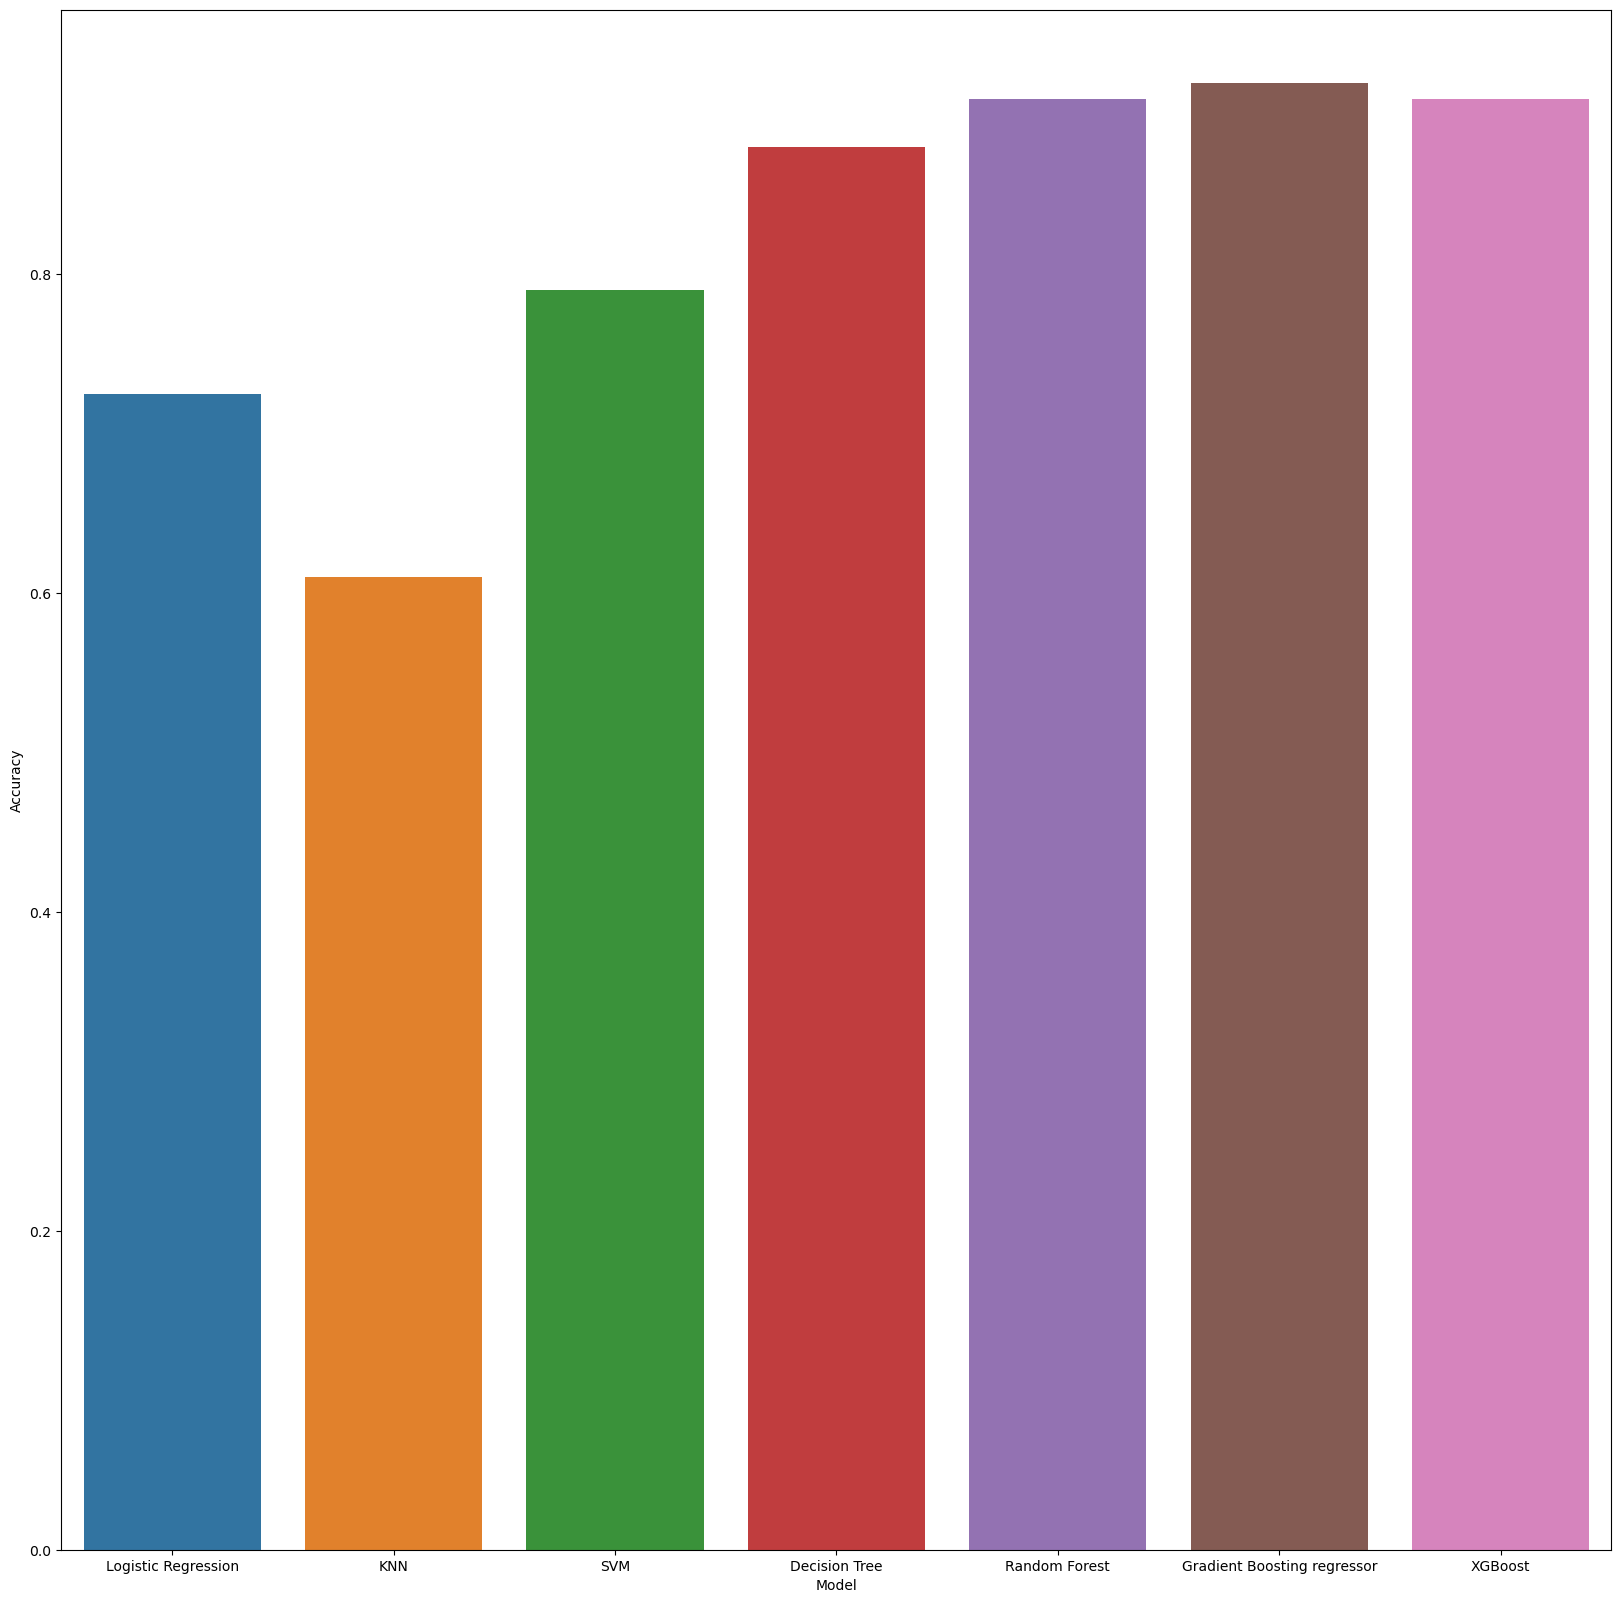

In [83]:
plt.figure(figsize=(20,20))
sns.barplot(x=model_results['Model'],y=model_results['Accuracy'])


# TOP FEATURES

In [84]:
# creating a function for plotting the feature importances.
def plot_feature_importance(algo):
  importance = algo.feature_importances_
  feat_importance=pd.DataFrame({'Features':x.columns,'score':importance}).sort_values(by='score',ascending=False)
  plt.figure(figsize=(10,8))
  sns.barplot(x=feat_importance['score'],y=feat_importance['Features'])
  plt.title('Feature Importance')

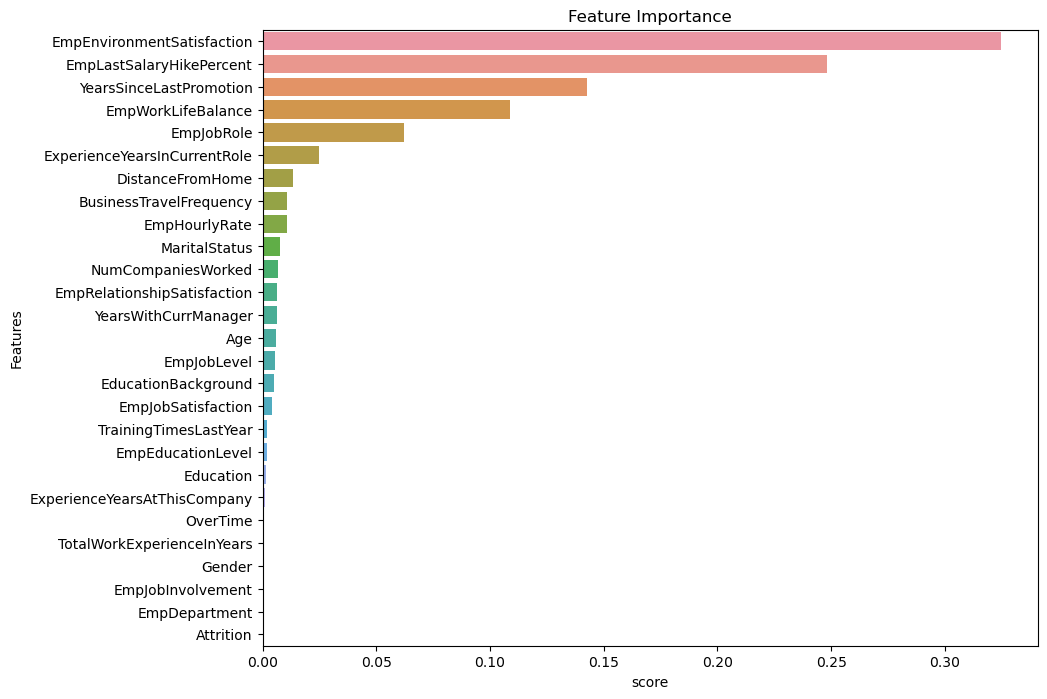

In [85]:
# Decision Tree
plot_feature_importance(dtc_optimal)

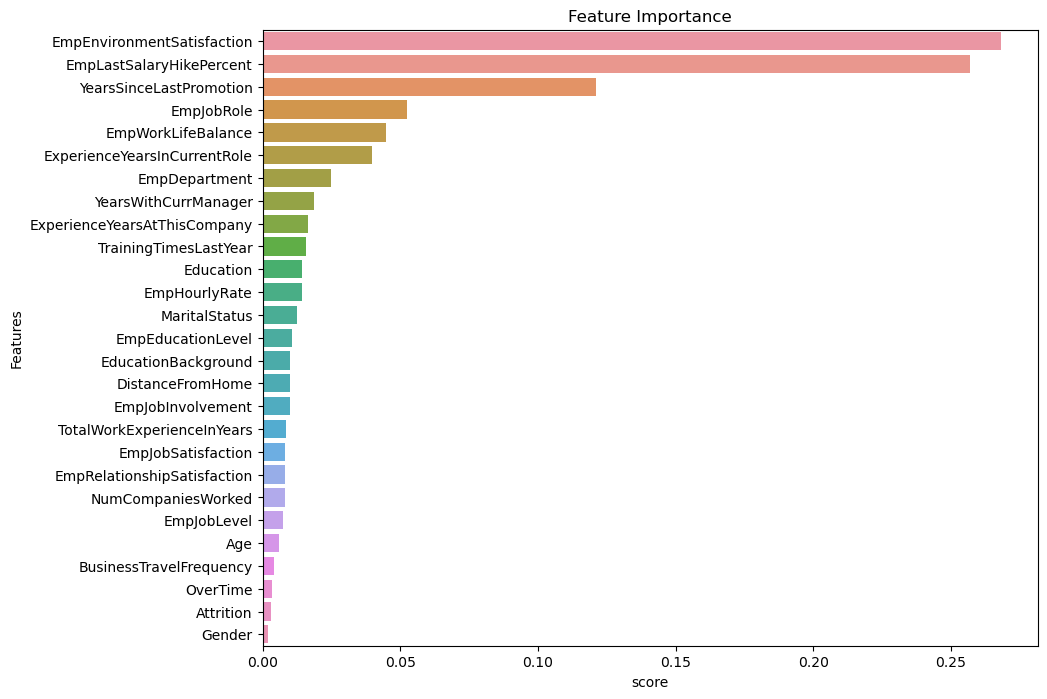

In [86]:
# Random Forest
plot_feature_importance(clsr)

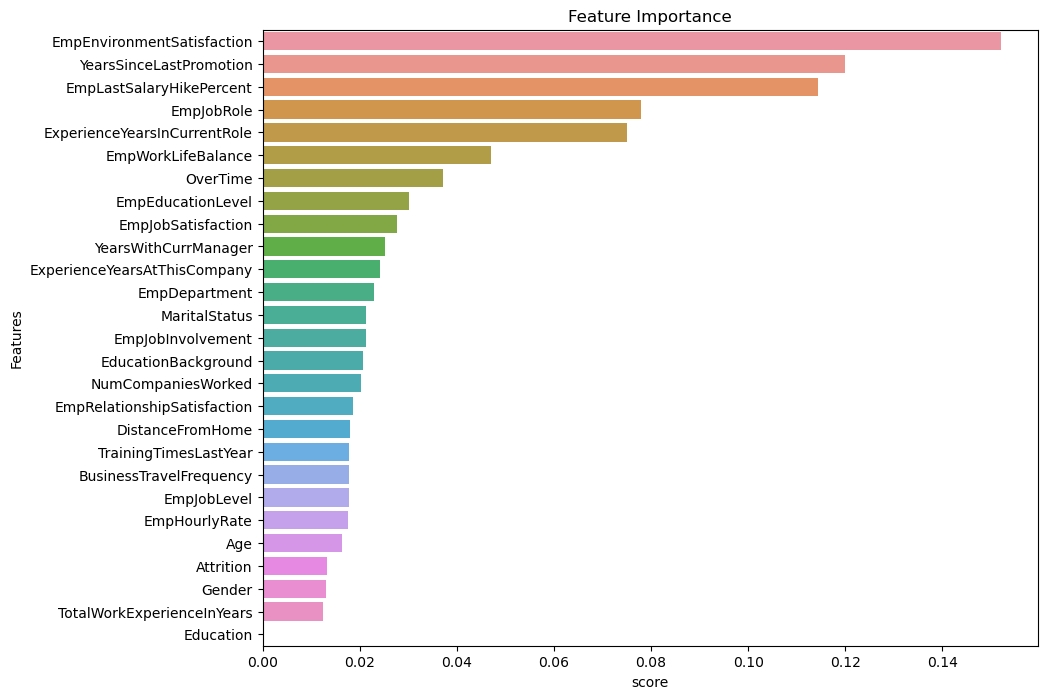

In [88]:
# XGB Classifier
plot_feature_importance(xgb_opti)

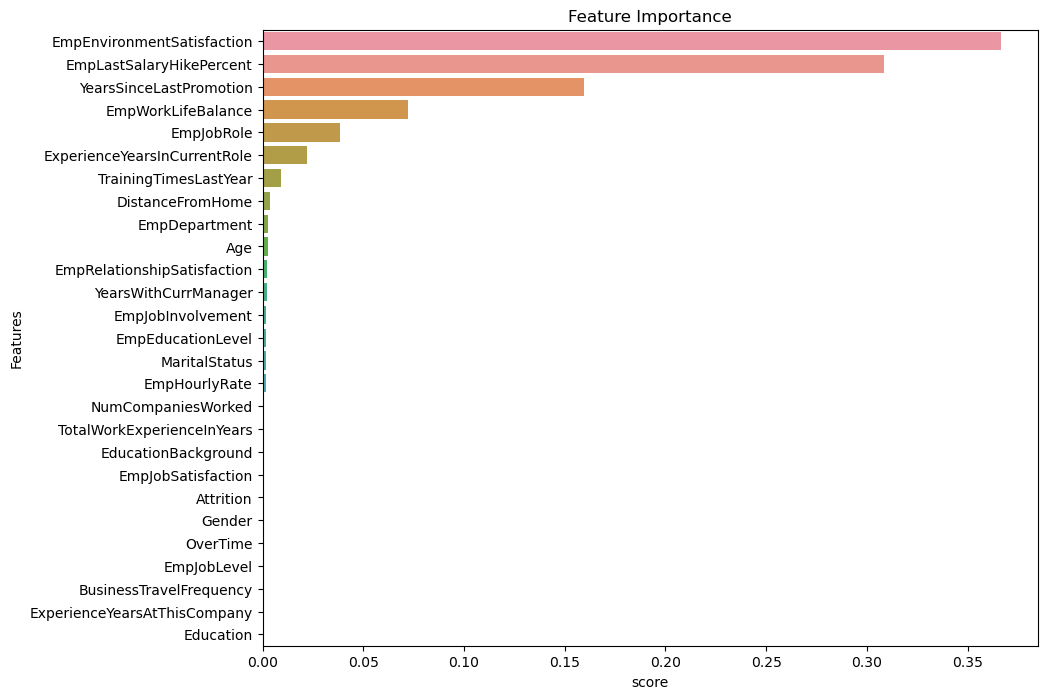

In [87]:
# Gradient Boosting
plot_feature_importance(gbc_optimal)

In [ ]:
Top  